# Classification of a characters personality trait (OCEAN) when speaking to others using unsupervised techniques

**Openness** - Describes an individual's openness to experience. A high score of this trait is great in a fast-growing company where there are many changes and ambiguity.

**Conscientiousness** - The degree to which a person is characterized by dependability, efficiency, and purposeful action.

**Extraversion**- Refers to a person's comfort level with his or her environment. A person high in extraversion is usually comfortable talking with new people. 

**Agreeableness** - Measures how well a person gets along with others, competitiveness, and cooperation. People who scored high in this spectrum are empathetic and work well in a team. 

**Neuroticism** - Measures a person's emotional stability. High neuroticism can lead to issues in the workplace. But just because an individual scored high in neuroticism, doesn't mean they should be disregarded completely.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('train_sent_emo.csv')

In [ ]:
df

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"
...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799"
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594"
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520"
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274"


In [ ]:
import pandas as pd

In [ ]:
l= ['Chandler','Joey','Rachel','Monica','Phoebe','Ross','Emily','Sergei']

In [ ]:
char_df = pd.DataFrame(0, index=l, columns=l)
char_df

,Chandler,Joey,Rachel,Monica,Phoebe,Ross,Emily,Sergei
Chandler,0,0,0,0,0,0,0,0
Joey,0,0,0,0,0,0,0,0
Rachel,0,0,0,0,0,0,0,0
Monica,0,0,0,0,0,0,0,0
Phoebe,0,0,0,0,0,0,0,0
Ross,0,0,0,0,0,0,0,0
Emily,0,0,0,0,0,0,0,0
Sergei,0,0,0,0,0,0,0,0


In [ ]:
for i in range(0,1587):
    for char1 in l:
        for char2 in l:
            if (char1 != char2) and char1 in df['Utterance'][i] and char2 in df['Speaker'][i]:
              print(char1, char2)
              char_df[char1][char2] += 1
              char_df[char2][char1] += 1
char_df

Monica Phoebe
Monica Phoebe
Rachel Joey
Phoebe Chandler
Ross Joey
Rachel Joey
Joey Rachel
Rachel Monica
Joey Monica
Phoebe Monica
Phoebe Chandler
Chandler Monica
Phoebe Monica
Phoebe Monica
Ross Rachel
Ross Rachel
Ross Phoebe
Ross Monica
Ross Monica
Ross Joey
Ross Joey
Joey Monica
Joey Monica
Rachel Ross
Ross Rachel
Rachel Monica
Ross Monica
Joey Monica
Chandler Monica
Monica Rachel
Rachel Ross
Phoebe Monica
Ross Rachel
Monica Phoebe
Ross Rachel
Ross Rachel
Monica Rachel
Chandler Joey
Rachel Phoebe
Ross Phoebe
Joey Rachel
Ross Joey
Joey Monica
Ross Joey
Chandler Phoebe
Joey Phoebe
Chandler Monica
Chandler Monica
Rachel Monica
Chandler Rachel
Monica Rachel
Ross Rachel
Joey Rachel
Chandler Monica
Ross Joey
Chandler Monica
Joey Rachel
Ross Rachel
Ross Phoebe
Joey Chandler
Chandler Ross
Monica Rachel
Rachel Monica
Monica Ross
Rachel Ross
Emily Ross
Monica Rachel
Phoebe Monica
Phoebe Monica
Joey Rachel
Joey Rachel
Chandler Rachel
Monica Rachel
Chandler Rachel
Chandler Monica
Phoebe Monica
R

,Chandler,Joey,Rachel,Monica,Phoebe,Ross,Emily,Sergei
Chandler,0,5,4,8,4,1,0,0
Joey,5,0,8,6,1,7,0,0
Rachel,4,8,0,10,3,15,0,0
Monica,8,6,10,0,10,6,0,0
Phoebe,4,1,3,10,0,3,0,0
Ross,1,7,15,6,3,0,1,0
Emily,0,0,0,0,0,1,0,0
Sergei,0,0,0,0,0,0,0,0


In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [ ]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
import pandas as pd
import seaborn as sns
import community
import csv

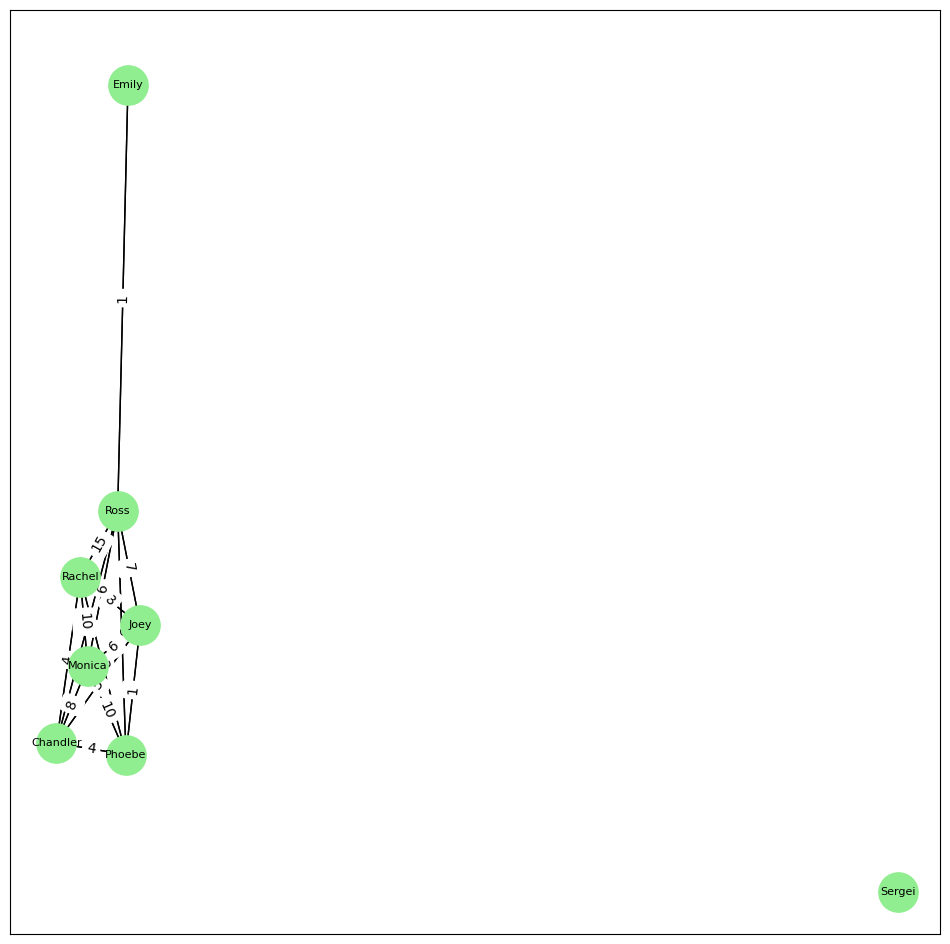

In [ ]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [ ]:
emotion = ['sadness','surprise','neutral','joy','anger']

In [ ]:
char_df1 = pd.DataFrame(0, index=l, columns=emotion)
char_df1

,sadness,surprise,neutral,joy,anger
Chandler,0,0,0,0,0
Joey,0,0,0,0,0
Rachel,0,0,0,0,0
Monica,0,0,0,0,0
Phoebe,0,0,0,0,0
Ross,0,0,0,0,0
Emily,0,0,0,0,0
Sergei,0,0,0,0,0


In [ ]:
for i in range(0,1587):
  if(df['Emotion'][i]=='joy') and df['Speaker'][i] in l :
    char_df1['joy'][df['Speaker'][i]] +=1 
  if(df['Emotion'][i]=='surprise' and df['Speaker'][i] in l):
    char_df1['surprise'][df['Speaker'][i]] +=1 
  if(df['Emotion'][i]=='anger' and df['Speaker'][i] in l):
    char_df1['anger'][df['Speaker'][i]] +=1 
  if(df['Emotion'][i]=='neutral' and df['Speaker'][i] in l):
    char_df1['neutral'][df['Speaker'][i]] +=1 
  if(df['Emotion'][i]=='sadness' and df['Speaker'][i] in l):
    char_df1['sadness'][df['Speaker'][i]] +=1 

In [ ]:
char_df1

,sadness,surprise,neutral,joy,anger
Chandler,9,29,110,33,18
Joey,10,38,125,53,31
Rachel,24,25,81,37,23
Monica,7,24,85,34,20
Phoebe,11,20,74,18,32
Ross,9,18,144,47,32
Emily,0,1,2,1,0
Sergei,0,1,0,0,0


In [ ]:
char_df1.to_csv('emotion.csv')

In [ ]:
ff = pd.read_csv('emotion.csv')

In [ ]:
ff

,Unnamed: 0,sadness,surprise,neutral,joy,anger
0,Chandler,9,29,110,33,18
1,Joey,10,38,125,53,31
2,Rachel,24,25,81,37,23
3,Monica,7,24,85,34,20
4,Phoebe,11,20,74,18,32
5,Ross,9,18,144,47,32
6,Emily,0,1,2,1,0
7,Sergei,0,1,0,0,0


In [ ]:
p = ['positive','negative']

In [ ]:
char_df2 = pd.DataFrame(0, index=l, columns=p)
char_df2

,positive,negative
Chandler,0,0
Joey,0,0
Rachel,0,0
Monica,0,0
Phoebe,0,0
Ross,0,0
Emily,0,0
Sergei,0,0


In [ ]:
for i in range(0,1587):
  if(df['Sentiment'][i]=='negative') and df['Speaker'][i] in l :
    char_df2['negative'][df['Speaker'][i]] +=1 
  if(df['Sentiment'][i]=='positive' and df['Speaker'][i] in l):
    char_df2['positive'][df['Speaker'][i]] +=1 

In [ ]:
char_df2

,positive,negative
Chandler,44,79
Joey,68,85
Rachel,54,70
Monica,44,51
Phoebe,28,57
Ross,59,63
Emily,2,2
Sergei,1,0


In [ ]:
char_df2.to_csv('try.csv')

In [ ]:
f = pd.read_csv('try.csv')

In [ ]:
f

,Unnamed: 0,positive,negative
0,Chandler,44,79
1,Joey,68,85
2,Rachel,54,70
3,Monica,44,51
4,Phoebe,28,57
5,Ross,59,63
6,Emily,2,2
7,Sergei,1,0


In [ ]:
result = pd.concat([f, ff],axis=1)

In [ ]:
result

,Unnamed: 0,positive,negative,Unnamed: 0,sadness,surprise,neutral,joy,anger
0,Chandler,44,79,Chandler,9,29,110,33,18
1,Joey,68,85,Joey,10,38,125,53,31
2,Rachel,54,70,Rachel,24,25,81,37,23
3,Monica,44,51,Monica,7,24,85,34,20
4,Phoebe,28,57,Phoebe,11,20,74,18,32
5,Ross,59,63,Ross,9,18,144,47,32
6,Emily,2,2,Emily,0,1,2,1,0
7,Sergei,1,0,Sergei,0,1,0,0,0


In [ ]:
x = result.T.drop_duplicates().T
print(x)

  Unnamed: 0 positive negative sadness surprise neutral joy anger
0   Chandler       44       79       9       29     110  33    18
1       Joey       68       85      10       38     125  53    31
2     Rachel       54       70      24       25      81  37    23
3     Monica       44       51       7       24      85  34    20
4     Phoebe       28       57      11       20      74  18    32
5       Ross       59       63       9       18     144  47    32
6      Emily        2        2       0        1       2   1     0
7     Sergei        1        0       0        1       0   0     0


In [ ]:
df = pd.DataFrame()
df = x

In [ ]:
df

,Unnamed: 0,positive,negative,sadness,surprise,neutral,joy,anger
0,Chandler,44,79,9,29,110,33,18
1,Joey,68,85,10,38,125,53,31
2,Rachel,54,70,24,25,81,37,23
3,Monica,44,51,7,24,85,34,20
4,Phoebe,28,57,11,20,74,18,32
5,Ross,59,63,9,18,144,47,32
6,Emily,2,2,0,1,2,1,0
7,Sergei,1,0,0,1,0,0,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np
X=df.drop("Unnamed: 0",axis=1)
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,7):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,7),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,7],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [ ]:
import plotly.express as px
kmeans = KMeans(
        n_clusters=5, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=df.drop("Unnamed: 0",axis=1).columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [ ]:
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['aqua','pink','green','orange','yellow'])

In [ ]:
kmeans.labels_

array([2, 3, 4, 2, 1, 3, 0, 0], dtype=int32)

In [ ]:
for i in range(0,7):
  if(clusters['label'][i]==0): clusters['label'][i] = 'Openness'
  elif(clusters['label'][i]==1): clusters['label'][i] = 'Conscientiousness'
  elif(clusters['label'][i]==2): clusters['label'][i] = 'Neuroticism'
  elif(clusters['label'][i]==3): clusters['label'][i] = 'Extraversion'
  else: clusters['label'][i] = 'Agreeableness'

<ipython-input-35-9ff3f24fd52c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clusters['characters'] = ff['Unnamed: 0']

In [ ]:
clusters

,positive,negative,sadness,surprise,neutral,joy,anger,label,characters
0,0.641791,0.929412,0.375000,0.756757,0.763889,0.622642,0.56250,Neuroticism,Chandler
1,1.000000,1.000000,0.416667,1.000000,0.868056,1.000000,0.96875,Extraversion,Joey
2,0.791045,0.823529,1.000000,0.648649,0.562500,0.698113,0.71875,Agreeableness,Rachel
3,0.641791,0.600000,0.291667,0.621622,0.590278,0.641509,0.62500,Neuroticism,Monica
4,0.402985,0.670588,0.458333,0.513514,0.513889,0.339623,1.00000,Conscientiousness,Phoebe
5,0.865672,0.741176,0.375000,0.459459,1.000000,0.886792,1.00000,Extraversion,Ross
6,0.014925,0.023529,0.000000,0.000000,0.013889,0.018868,0.00000,Openness,Emily
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0,Sergei
